In [1]:
#Avg_IMG_Viewer.py created by BWM 9/12/22
#program to create pretty averaged images plot and save them

import numpy as np
import Big_keck_load as BKL
import os
import matplotlib
import matplotlib.pyplot as plt
import sys
import tkinter.filedialog as fd
import Geo_Corr as gc
import xarray as xr
import mplcursors
# import hvplot.xarray
import panel.widgets as pnw
from ipywidgets import *
# import panel as pn
# import panel.widgets as pnw
import mplcursors 


In [2]:

foreFile = ("/Users/benjaminmartin/Downloads/220nsTD_00000001.raw")
#foreFile = "/Volumes/BMartin/KeckData/run-1ms_flat_fore/frames/1ms_flat_fore_00000001.raw"
cwd = os.getcwd()
foreImage = open(foreFile,"rb")
# backImage = open(backFile,"rb")
numImagesF = int(os.path.getsize(foreFile)/(1024+512*512*2))
# numImagesB = int(os.path.getsize(backFile)/(1024+512*512*2))
foreStack =np.zeros(((numImagesF),8,612,532),dtype=np.double)
# backStack = np.zeros((8,512,512),dtype=np.double)
# Stack ={'pixels':(["frameNum","capNum","x","y"], foreStack, 
#                          {'units': 'ADU', 
#                           'long_name':'data from PAD uncorrected'})}




for fIdex in range(numImagesF):
   payload = BKL.keckFrame(foreImage)
   foreStack[(payload[5]-1),(payload[3]-1)%8,:,:] += gc.GeoCor(gc.doublePixelAdd(np.resize(payload[4],[512,512])))

Stack =xr.Dataset({'stack1':(["frameNum","capNum","y","x"], foreStack, 
                        {'units': 'ADU', 
                        'long_name':'Keck-PAD'})})


In [3]:
#%matplotlib widget

In [4]:
SD = widgets.IntSlider(min =0, max = numImagesF-1,step = 1, value = 0)
# df = Stack.stack1.interactive.sel(frameNum=SD, capNum = SD).plot()   
# df
# meanStack = np.average(Stack.stack1)
# sdStack = np.std(Stack.stack1)

# clipHigh = int(meanStack + 3*sdStack)
# clipLow = int(meanStack - 4*sdStack)
clipHigh = 40000
clipH = widgets.IntSlider(min =0, max = clipHigh,step = 100, value = clipHigh)
clipL = widgets.IntSlider(min =0, max = clipHigh,step = 100, value = 0)
#title(title=))
def Slider (Frame,ClipHigh,ClipLow):
    df = np.clip(Stack.stack1.sel(frameNum=Frame, capNum = Frame%8,),ClipLow,ClipHigh)
    #x = df.plot()
    #if you want to use 2-98% of data for cmap)
    x= df.plot(robust=True)
    capNum = Frame&7
    plt.title("Frame Number {}, Cap Number {}".format(Frame+1,capNum+1))
    plt.gca().invert_yaxis()
    # mplcursors.cursor()
    return x

# title=("Frame Number {}, Cap Number {}".format(Frame,Frame&8) 
interact(Slider, Frame = SD, ClipLow = clipL, ClipHigh = clipH,)



interactive(children=(IntSlider(value=0, description='Frame', max=159), IntSlider(value=40000, description='Cl…

<function __main__.Slider(Frame, ClipHigh, ClipLow)>

KeyError: 'y'

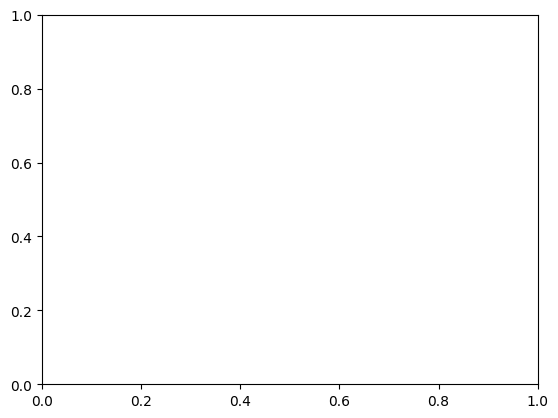

In [5]:
# %%
from matplotlib.widgets import MultiCursor
SD = widgets.IntSlider(min =0, max = numImagesF-1,step = 1, value = 0)
# df = Stack.stack1.interactive.sel(frameNum=SD, capNum = SD).plot()   
# df
# meanStack = np.average(Stack.stack1)
# sdStack = np.std(Stack.stack1)

# clipHigh = int(meanStack + 3*sdStack)
# clipLow = int(meanStack - 4*sdStack)
clipHigh = 40000
clipH = widgets.IntSlider(min =0, max = clipHigh,step = 100, value = clipHigh)

#title(title=))
#def Slider (Frame,ClipHigh,):
Frame = 1   
df = np.clip(Stack.stack1.sel(frameNum=Frame, capNum = Frame%8,),None,clipHigh)
fig, axs = plt.subplots(nrows=1, sharex=True)
# ax.legend(loc="upper right")
axs
df.plot.surface(x="x",y="y",z = df["x","y"])
#if you want to use 2-98% of data for cmap)
capNum = Frame&7
plt.title("Frame Number {}, Cap Number {}".format(Frame+1,capNum+1))
plt.gca().invert_yaxis()
# multi = MultiCursor(fig.canvas, ("x","y"), color='g', lw=2,
#                 horizOn=False, vertOn=True)

# plt.draw()

# title=("Frame Number {}, Cap Number {}".format(Frame,Frame&8) 
# interact(Slider, Frame = SD, ClipHigh = clipH,)

